# Bibliotecas

## Básicos (numpy, pandas, math, display, locale, time, random)

In [1]:
# !python -m pip install pandas
# !python -m pip install openpyxl
# !python -m pip install xlrd
# !python -m pip install jupyter
# !python -m pip install numpy
# # !python -m pip install random
# !python -m pip install IPython


from IPython.display import display

import pandas as pd
import math
import numpy as np
import locale
# locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")  # Use "" for auto, or force e.g. to "en_US.UTF-8"

import time
from datetime import datetime, timedelta, date
import random

import openpyxl

## Finanças (yfinance, mplfinance)

In [2]:
# https://pypi.org/project/yfinance/
# https://github.com/ranaroussi/yfinance/wiki/Ticker

!python -m pip install yfinance
import yfinance as yf

!pip install mplfinance
import mplfinance as mpf

# # Em R
# # https://cran.r-project.org/web/packages/BatchGetSymbols/index.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 454.5 kB/s eta 0:00:00


## Visualização (matplotlib, seaborn, plotly)

In [3]:
# !python -m pip install matplotlib
# !python -m pip install seaborn
!python -m pip install plotly

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## Séries temporais (statsmodels, Prophet)

In [4]:
# !python -m pip install statsmodels
# from statsmodels.tsa.seasonal import seasonal_decompose

!python -m pip install prophet
from prophet import Prophet

# Leitura

In [5]:
dados_jnj = yf.Ticker("JNJ").history(
    # period = "30d",
    # start = datetime.today() - timedelta(days=365),
    end = datetime.today(),
    start = "2020-01-01",
    # end = "2023-12-31",
    interval = "1d"
).reset_index()

dados_jnj

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02 00:00:00-05:00,130.009973,130.143672,129.305874,130.099106,5777000,0.0,0.0
1,2020-01-03 00:00:00-05:00,127.897688,129.564365,127.452052,128.592880,5752400,0.0,0.0
2,2020-01-06 00:00:00-05:00,128.343301,128.521553,127.318343,128.432434,7731300,0.0,0.0
3,2020-01-07 00:00:00-05:00,128.352230,129.635666,126.008191,129.216766,7382900,0.0,0.0
4,2020-01-08 00:00:00-05:00,129.118704,130.108017,128.075916,129.198929,6605800,0.0,0.0
...,...,...,...,...,...,...,...,...
1064,2024-03-26 00:00:00-04:00,155.610001,156.229996,154.759995,155.770004,6864100,0.0,0.0
1065,2024-03-27 00:00:00-04:00,155.990005,158.220001,155.440002,157.960007,8461600,0.0,0.0
1066,2024-03-28 00:00:00-04:00,158.199997,159.139999,158.110001,158.190002,6181500,0.0,0.0
1067,2024-04-01 00:00:00-04:00,157.720001,158.149994,156.770004,157.779999,4364700,0.0,0.0


# Separação dos dados em treino e teste

In [6]:
dados_jnj_treino = dados_jnj[dados_jnj["Date"] < "2023-07-31"]
dados_jnj_teste = dados_jnj[dados_jnj["Date"] >= "2023-07-31"]

display(dados_jnj_treino)
display(dados_jnj_teste)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-02 00:00:00-05:00,130.009973,130.143672,129.305874,130.099106,5777000,0.0,0.0
1,2020-01-03 00:00:00-05:00,127.897688,129.564365,127.452052,128.592880,5752400,0.0,0.0
2,2020-01-06 00:00:00-05:00,128.343301,128.521553,127.318343,128.432434,7731300,0.0,0.0
3,2020-01-07 00:00:00-05:00,128.352230,129.635666,126.008191,129.216766,7382900,0.0,0.0
4,2020-01-08 00:00:00-05:00,129.118704,130.108017,128.075916,129.198929,6605800,0.0,0.0
...,...,...,...,...,...,...,...,...
894,2023-07-24 00:00:00-04:00,167.638340,169.906107,167.139829,167.227798,15155400,0.0,0.0
895,2023-07-25 00:00:00-04:00,166.611951,168.791734,165.927716,168.508270,13790100,0.0,0.0
896,2023-07-26 00:00:00-04:00,168.127067,169.935417,167.540572,168.830856,14288200,0.0,0.0
897,2023-07-27 00:00:00-04:00,168.302998,170.365488,168.166151,169.779007,12446400,0.0,0.0


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
899,2023-07-31 00:00:00-04:00,165.869072,166.387137,162.956177,163.757706,22632700,0.0,0.0
900,2023-08-01 00:00:00-04:00,162.623836,165.282591,162.320819,165.087097,15810300,0.0,0.0
901,2023-08-02 00:00:00-04:00,165.047992,167.384176,165.047992,166.084122,14595600,0.0,0.0
902,2023-08-03 00:00:00-04:00,166.123233,167.462395,165.849539,166.797699,17424800,0.0,0.0
903,2023-08-04 00:00:00-04:00,166.504434,168.791741,164.109604,165.233704,23414300,0.0,0.0
...,...,...,...,...,...,...,...,...
1064,2024-03-26 00:00:00-04:00,155.610001,156.229996,154.759995,155.770004,6864100,0.0,0.0
1065,2024-03-27 00:00:00-04:00,155.990005,158.220001,155.440002,157.960007,8461600,0.0,0.0
1066,2024-03-28 00:00:00-04:00,158.199997,159.139999,158.110001,158.190002,6181500,0.0,0.0
1067,2024-04-01 00:00:00-04:00,157.720001,158.149994,156.770004,157.779999,4364700,0.0,0.0


# Preparação para o Prophet

In [7]:
dados_jnj_treino_prophet = dados_jnj_treino.copy()
dados_jnj_teste_prophet = dados_jnj_teste.copy()

dados_jnj_treino_prophet = dados_jnj_treino_prophet[["Date", "Close"]].rename(columns = {"Date": "ds", "Close": "y"})
dados_jnj_teste_prophet = dados_jnj_teste_prophet[["Date", "Close"]].rename(columns = {"Date": "ds", "Close": "y"})

dados_jnj_treino_prophet["ds"] = dados_jnj_treino_prophet["ds"].dt.tz_localize(None)
dados_jnj_teste_prophet["ds"] = dados_jnj_teste_prophet["ds"].dt.tz_localize(None)

dados_jnj_treino_prophet
dados_jnj_teste_prophet

,ds,y
899,2023-07-31,163.757706
900,2023-08-01,165.087097
901,2023-08-02,166.084122
902,2023-08-03,166.797699
903,2023-08-04,165.233704
...,...,...
1064,2024-03-26,155.770004
1065,2024-03-27,157.960007
1066,2024-03-28,158.190002
1067,2024-04-01,157.779999


# Modelagem Prophet

In [8]:
modelo_jnj_prophet_1 = Prophet(
    weekly_seasonality = True,
    yearly_seasonality = True,
    daily_seasonality = False
    ).add_country_holidays(country_name = "US"
    ).fit(dados_jnj_treino_prophet)

modelo_jnj_prophet_1

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ixnx2la/yqxk5wwp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ixnx2la/6iw0vdea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46447', 'data', 'file=/tmp/tmp5ixnx2la/yqxk5wwp.json', 'init=/tmp/tmp5ixnx2la/6iw0vdea.json', 'output', 'file=/tmp/tmp5ixnx2la/prophet_modelwyg2ulmf/prophet_model-20240402230844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:08:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:08:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
dados_jnj_treino_prophet_futuro = modelo_jnj_prophet_1.predict(modelo_jnj_prophet_1.make_future_dataframe(periods = int(np.round(len(dados_jnj_teste_prophet)/5*7,0))))

dados_jnj_treino_prophet_futuro

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,129.957098,129.240131,139.153540,129.957098,129.957098,0.0,0.0,0.0,0.0,...,0.159709,0.159709,0.159709,4.215622,4.215622,4.215622,0.0,0.0,0.0,134.332429
1,2020-01-03,129.955282,129.192744,139.356705,129.955282,129.955282,0.0,0.0,0.0,0.0,...,0.301007,0.301007,0.301007,4.016214,4.016214,4.016214,0.0,0.0,0.0,134.272503
2,2020-01-06,129.949835,128.675390,138.041984,129.949835,129.949835,0.0,0.0,0.0,0.0,...,-0.050534,-0.050534,-0.050534,3.380611,3.380611,3.380611,0.0,0.0,0.0,133.279912
3,2020-01-07,129.948019,128.401005,138.184970,129.948019,129.948019,0.0,0.0,0.0,0.0,...,0.090382,0.090382,0.090382,3.168791,3.168791,3.168791,0.0,0.0,0.0,133.207192
4,2020-01-08,129.946203,128.168788,138.266987,129.946203,129.946203,0.0,0.0,0.0,0.0,...,0.215691,0.215691,0.215691,2.963017,2.963017,2.963017,0.0,0.0,0.0,133.124910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,2024-03-18,146.507333,116.821174,159.618827,126.311741,168.243834,0.0,0.0,0.0,0.0,...,-0.050534,-0.050534,-0.050534,-8.882946,-8.882946,-8.882946,0.0,0.0,0.0,137.573853
1133,2024-03-19,146.472110,117.177777,158.600833,126.169424,168.368156,0.0,0.0,0.0,0.0,...,0.090382,0.090382,0.090382,-8.873546,-8.873546,-8.873546,0.0,0.0,0.0,137.688946
1134,2024-03-20,146.436887,117.550725,159.967028,126.002984,168.485764,0.0,0.0,0.0,0.0,...,0.215691,0.215691,0.215691,-8.837412,-8.837412,-8.837412,0.0,0.0,0.0,137.815166
1135,2024-03-21,146.401664,116.566242,160.043426,125.836543,168.474660,0.0,0.0,0.0,0.0,...,0.159709,0.159709,0.159709,-8.772616,-8.772616,-8.772616,0.0,0.0,0.0,137.788757


# Visualizações

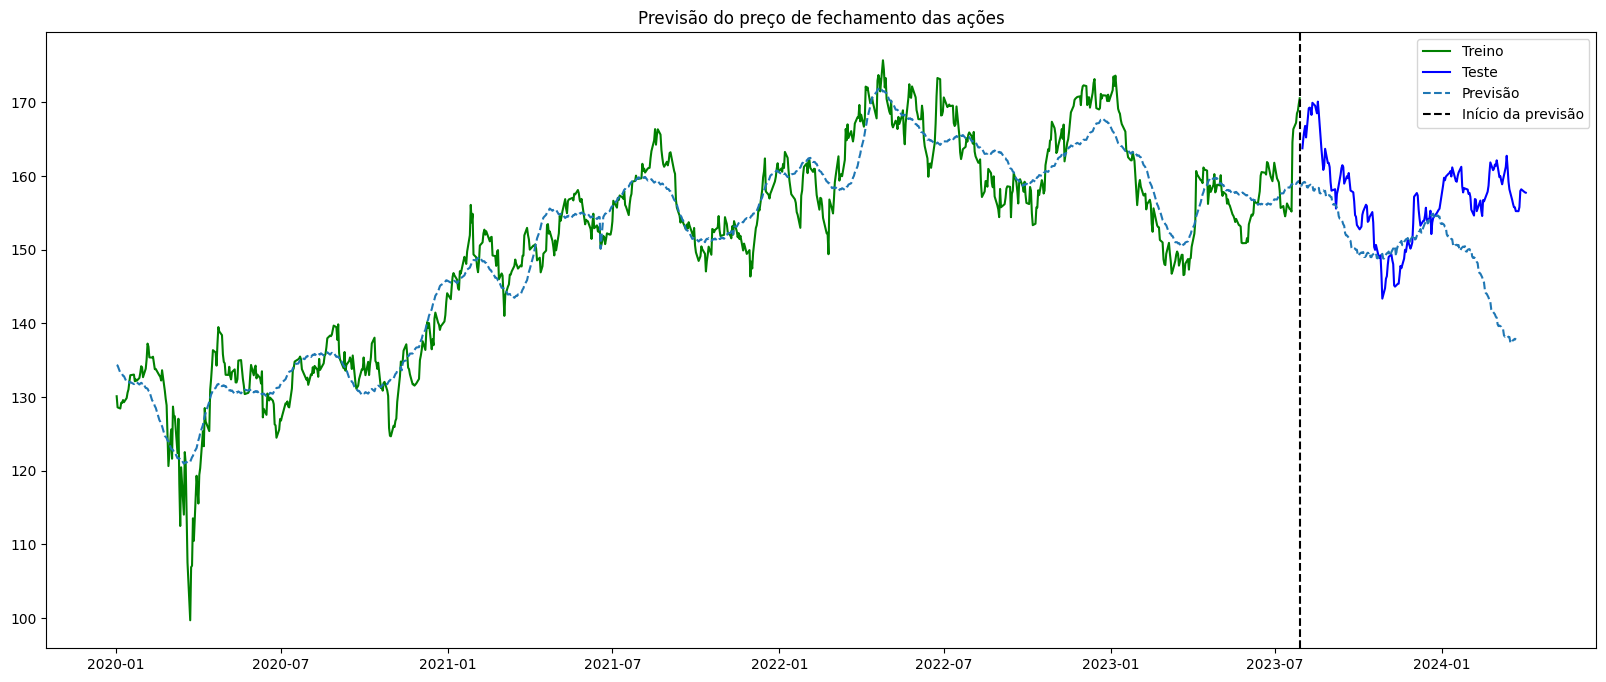

In [10]:
plt.figure(figsize = (20,8))

plt.plot(dados_jnj_treino_prophet["ds"], dados_jnj_treino_prophet["y"], label = "Treino", color = "green")
plt.plot(dados_jnj_teste_prophet["ds"], dados_jnj_teste_prophet["y"], label = "Teste", color = "blue")
plt.plot(dados_jnj_treino_prophet_futuro["ds"], dados_jnj_treino_prophet_futuro["yhat"], label = "Previsão", linestyle = "--")

plt.axvline(dados_jnj_treino_prophet["ds"].max(), color = "black", linestyle = "--", label = "Início da previsão")

plt.title("Previsão do preço de fechamento das ações")
plt.legend()
plt.show()